In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from statistics import mean
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
Score_Genre_df = pd.read_csv("../../csv_file/Score_Genre.csv")
Score_Genre_df = Score_Genre_df.set_index('Key')

# Empty columns need to be dropped after merge
# Trial and error of making DataFrames found that these four columns were all null
Score_Genre_df = Score_Genre_df.drop(['SHORT WAR', 'REALITY-TV', 'TALK-SHOW', 'GAME-SHOW'], axis=1)

Score_Genre_df.rename(columns = {"SCI-FI": "SCI_FI"}, inplace = True)
Score_Genre_df.head()

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ACTION,DRAMA,SCI_FI,THRILLER,MYSTERY,HISTORY,...,HORROR,DOCUMENTARY,WESTERN,BIOGRAPHY,FAMILY,MUSIC,MUSICAL,FANTASY,WAR,NEWS
Key,,,,,,,,,,,,,,,,,,,,,
5,16.0,61.0,8.0,29.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25.0,68.0,36.0,48.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,36.0,75.0,81.0,62.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,42.0,83.0,89.0,78.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16,37.0,63.0,91.0,70.0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# Grabbing all column names to see all genre names
# Then giving each genre its own DataFrame
for col in Score_Genre_df.columns:
    print(col)

Hidden_Gem_Score
IMDb_Score
Rotten_Tomatoes_Score
Metacritic_Score
ACTION
DRAMA
SCI_FI
THRILLER
MYSTERY
HISTORY
CRIME
ADVENTURE
ANIMATION
COMEDY
ROMANCE
SPORT
HORROR
DOCUMENTARY
WESTERN
BIOGRAPHY
FAMILY
MUSIC
MUSICAL
FANTASY
WAR
NEWS


In [6]:
# Action
Score_Genre_df_Action = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ACTION'])
Score_Genre_df_Action = Score_Genre_df_Action[Score_Genre_df_Action['ACTION']!= 0]
Score_Genre_df_Action

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ACTION
Key,,,,,
21,24.0,58.0,39.0,49.0,1
35,31.0,65.0,68.0,52.0,1
36,22.0,50.0,40.0,45.0,1
37,29.0,53.0,68.0,53.0,1
40,16.0,51.0,9.0,34.0,1
...,...,...,...,...,...
9379,43.0,74.0,76.0,63.0,1
9389,34.0,62.0,76.0,67.0,1
9406,32.0,67.0,68.0,55.0,1


In [17]:
# Set DataFrame to Action columns to lists for best fits
Action_IMDb_list = Score_Genre_df_Action['IMDb_Score'].tolist()
Action_Tomatoes_list = Score_Genre_df_Action['Rotten_Tomatoes_Score'].tolist()
Action_Metacritic_list = Score_Genre_df_Action['Metacritic_Score'].tolist()
Action_Hidden_Gem_list = Score_Genre_df_Action['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Action_IMDb_list, dtype=np.float64)
T = np.array(Action_Tomatoes_list, dtype=np.float64)
M = np.array(Action_Metacritic_list, dtype=np.float64)
H = np.array(Action_Hidden_Gem_list, dtype=np.float64)

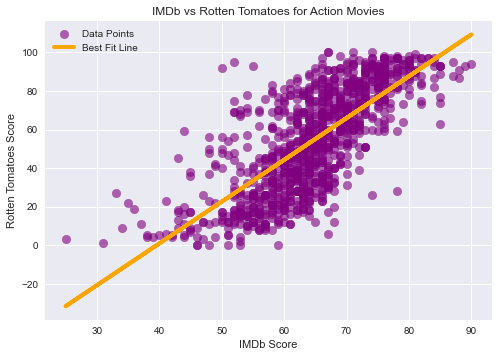

In [19]:
# IMDb vs. Rotten Tomatoes Action
# Create linear regression object
IMDb_Tomatoes_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Action.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Action.predict(I.reshape(-1,1))

# Code for making predictions
#IMDb_score = 30
#Rotten_Tomatoes_Score = IMDb_Tomatoes_Action.predict(np.array([[IMDb_score]]))[0]

# Commented out code above and below is for making predictions
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
#plt.scatter(IMDb_score,Rotten_Tomatoes_Score , label='Rotten Tomatoes Prediction',color='blue',s=100)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

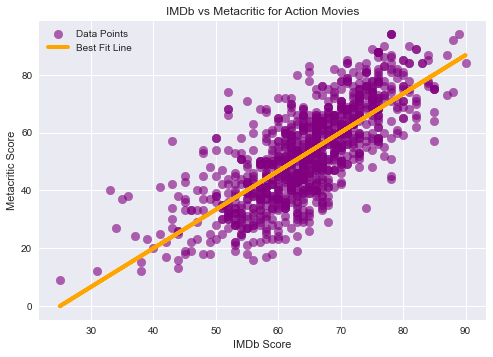

In [20]:
# IMDb vs. Metacritic Action
# Create linear regression object
IMDb_Metacritic_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Action.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Action.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

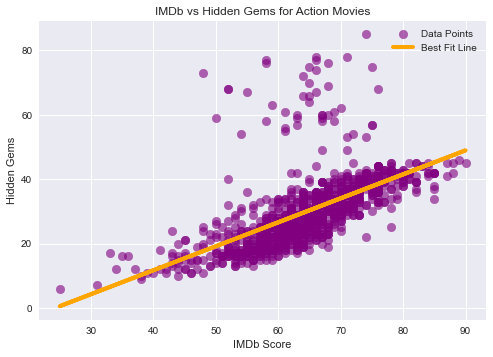

In [22]:
# IMDb vs. Hidden Gems Action
# Create linear regression object
IMDb_Hidden_Gems_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Action.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Action.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [23]:
# Drama
Score_Genre_df_Drama = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'DRAMA'])
Score_Genre_df_Drama = Score_Genre_df_Drama[Score_Genre_df_Drama['DRAMA']!= 0]
Score_Genre_df_Drama

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,DRAMA
Key,,,,,
5,16.0,61.0,8.0,29.0,1
6,25.0,68.0,36.0,48.0,1
8,36.0,75.0,81.0,62.0,1
15,42.0,83.0,89.0,78.0,1
16,37.0,63.0,91.0,70.0,1
...,...,...,...,...,...
9379,43.0,74.0,76.0,63.0,1
9380,26.0,63.0,44.0,51.0,1
9390,69.0,76.0,73.0,66.0,1


In [24]:
# Set DataFrame to Drama columns to lists for best fits
Drama_IMDb_list = Score_Genre_df_Drama['IMDb_Score'].tolist()
Drama_Tomatoes_list = Score_Genre_df_Drama['Rotten_Tomatoes_Score'].tolist()
Drama_Metacritic_list = Score_Genre_df_Drama['Metacritic_Score'].tolist()
Drama_Hidden_Gem_list = Score_Genre_df_Drama['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Drama_IMDb_list, dtype=np.float64)
T = np.array(Drama_Tomatoes_list, dtype=np.float64)
M = np.array(Drama_Metacritic_list, dtype=np.float64)
H = np.array(Drama_Hidden_Gem_list, dtype=np.float64)

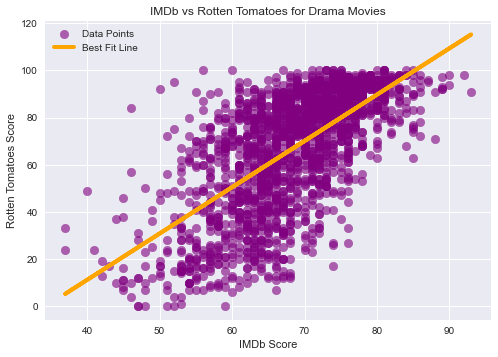

In [25]:
# IMDb vs. Rotten Tomatoes Drama
# Create linear regression object
IMDb_Tomatoes_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Drama.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

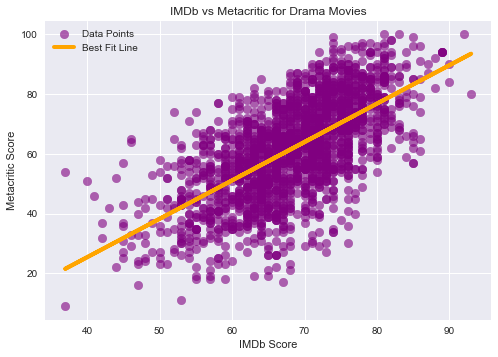

In [26]:
# IMDb vs. Metacritic Drama
# Create linear regression object
IMDb_Metacritic_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Drama.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

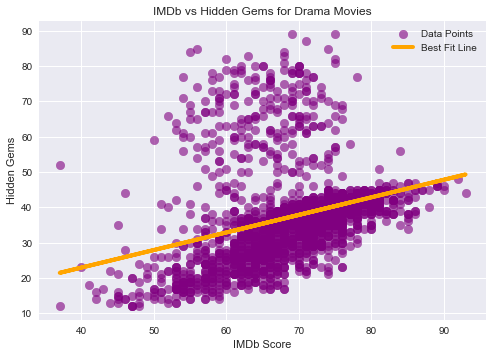

In [27]:
# IMDb vs. Hidden Gems Drama
# Create linear regression object
IMDb_Hidden_Gems_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Drama.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Science-Fiction
Score_Genre_df_SciFi = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'SCI_FI'])
Score_Genre_df_SciFi = Score_Genre_df_SciFi[Score_Genre_df_SciFi['SCI_FI']!= 0]
Score_Genre_df_SciFi

In [ ]:
# Thriller
Score_Genre_df_Thriller = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'THRILLER'])
Score_Genre_df_Thriller = Score_Genre_df_Thriller[Score_Genre_df_Thriller['THRILLER']!= 0]
Score_Genre_df_Thriller

In [ ]:
# Mystery
Score_Genre_df_Mystery = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MYSTERY'])
Score_Genre_df_Mystery = Score_Genre_df_Mystery[Score_Genre_df_Mystery['MYSTERY']!= 0]
Score_Genre_df_Mystery

In [ ]:
# History
Score_Genre_df_History = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'HISTORY'])
Score_Genre_df_History = Score_Genre_df_History[Score_Genre_df_History['HISTORY']!= 0]
Score_Genre_df_History

In [ ]:
# Crime
Score_Genre_df_Crime = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'CRIME'])
Score_Genre_df_Crime = Score_Genre_df_Crime[Score_Genre_df_Crime['CRIME']!= 0]
Score_Genre_df_Crime

In [ ]:
# Adventure
Score_Genre_df_Adventure = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ADVENTURE'])
Score_Genre_df_Adventure = Score_Genre_df_Adventure[Score_Genre_df_Adventure['ADVENTURE']!= 0]
Score_Genre_df_Adventure

In [ ]:
# Animation
Score_Genre_df_Animation = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ANIMATION'])
Score_Genre_df_Animation = Score_Genre_df_Animation[Score_Genre_df_Animation['ANIMATION']!= 0]
Score_Genre_df_Animation

In [ ]:
# Comedy
Score_Genre_df_Comedy = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'COMEDY'])
Score_Genre_df_Comedy = Score_Genre_df_Comedy[Score_Genre_df_Comedy['COMEDY']!= 0]
Score_Genre_df_Comedy

In [ ]:
# Romance
Score_Genre_df_Romance = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ROMANCE'])
Score_Genre_df_Romance = Score_Genre_df_Romance[Score_Genre_df_Romance['ROMANCE']!= 0]
Score_Genre_df_Romance

In [ ]:
# Sport
Score_Genre_df_Sport = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'SPORT'])
Score_Genre_df_Sport = Score_Genre_df_Sport [Score_Genre_df_Sport ['SPORT']!= 0]
Score_Genre_df_Sport 

In [ ]:
# Horror
Score_Genre_df_Horror = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'HORROR'])
Score_Genre_df_Horror = Score_Genre_df_Horror[Score_Genre_df_Horror['HORROR']!= 0]
Score_Genre_df_Horror

In [ ]:
# Documentary
Score_Genre_df_Documentary = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'DOCUMENTARY'])
Score_Genre_df_Documentary = Score_Genre_df_Documentary[Score_Genre_df_Documentary['DOCUMENTARY']!= 0]
Score_Genre_df_Documentary

In [ ]:
# Western
Score_Genre_df_Western = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'WESTERN'])
Score_Genre_df_Western = Score_Genre_df_Western[Score_Genre_df_Western['WESTERN']!= 0]
Score_Genre_df_Western

In [ ]:
# Biography
Score_Genre_df_Biography = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'BIOGRAPHY'])
Score_Genre_df_Biography = Score_Genre_df_Biography[Score_Genre_df_Biography['BIOGRAPHY']!= 0]
Score_Genre_df_Biography

In [ ]:
# Family
Score_Genre_df_Family = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'FAMILY'])
Score_Genre_df_Family = Score_Genre_df_Family[Score_Genre_df_Family['FAMILY']!= 0]
Score_Genre_df_Family

In [ ]:
# Music
Score_Genre_df_Music = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MUSIC'])
Score_Genre_df_Music = Score_Genre_df_Music[Score_Genre_df_Music['MUSIC']!= 0]
Score_Genre_df_Music

In [ ]:
# Musical
Score_Genre_df_Musical = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MUSICAL'])
Score_Genre_df_Musical = Score_Genre_df_Musical[Score_Genre_df_Musical['MUSICAL']!= 0]
Score_Genre_df_Musical

In [ ]:
# Fantasy
Score_Genre_df_Fantasy = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'FANTASY'])
Score_Genre_df_Fantasy = Score_Genre_df_Fantasy[Score_Genre_df_Fantasy['FANTASY']!= 0]
Score_Genre_df_Fantasy

In [ ]:
# War
Score_Genre_df_War = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'WAR'])
Score_Genre_df_War = Score_Genre_df_War[Score_Genre_df_War['WAR']!= 0]
Score_Genre_df_War

In [ ]:
# News
Score_Genre_df_News = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'NEWS'])
Score_Genre_df_News = Score_Genre_df_News[Score_Genre_df_News['NEWS']!= 0]
Score_Genre_df_News